In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv(r'D:\home 2\Machine Learning\ml\Machine Learning A-Z (Codes and Datasets)\Part 4 - Clustering\Section 24 - K-Means Clustering\Python\Mall_Customers.csv')

In [4]:
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


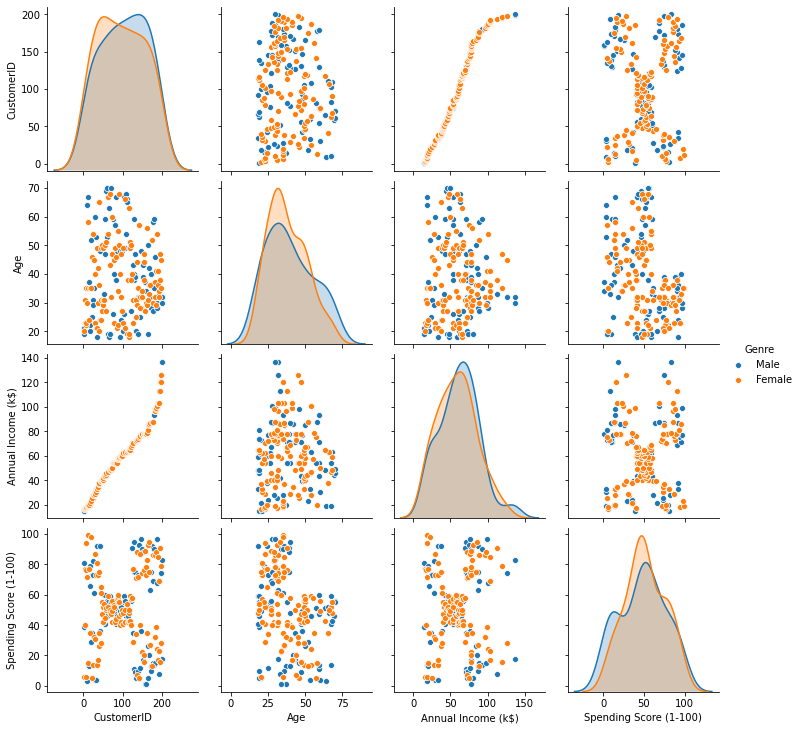

In [8]:
sns.pairplot(df,hue ='Genre')

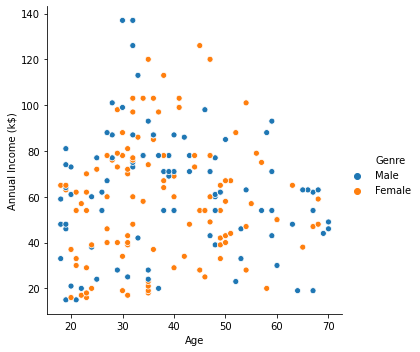

In [9]:
sns.relplot(x = 'Age',y = "Annual Income (k$)",data = df,hue = 'Genre' )

In [10]:
X = df.iloc[:,[3,4]].values

In [11]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

<Figure size 720x432 with 0 Axes>

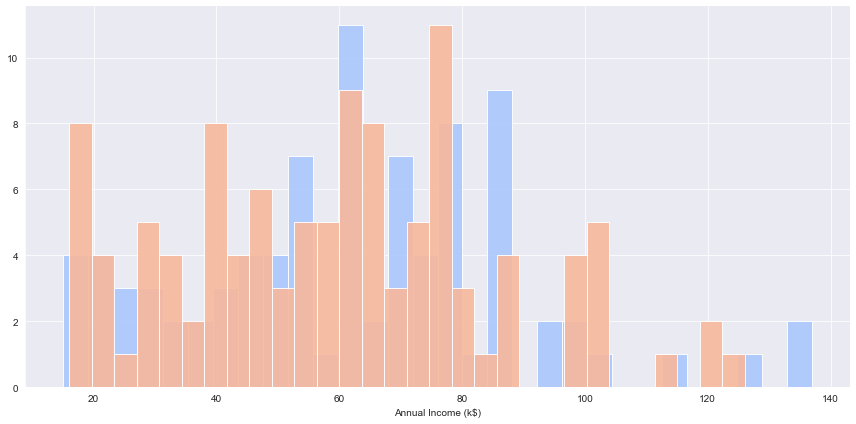

In [12]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
g = sns.FacetGrid(df,palette='coolwarm',height= 6,aspect = 2,hue = 'Genre')
g = g.map(plt.hist,"Annual Income (k$)",bins = 30,alpha = 0.9)

D:\Users\rakhipurwar\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 0.98, 'Spending score based on age')

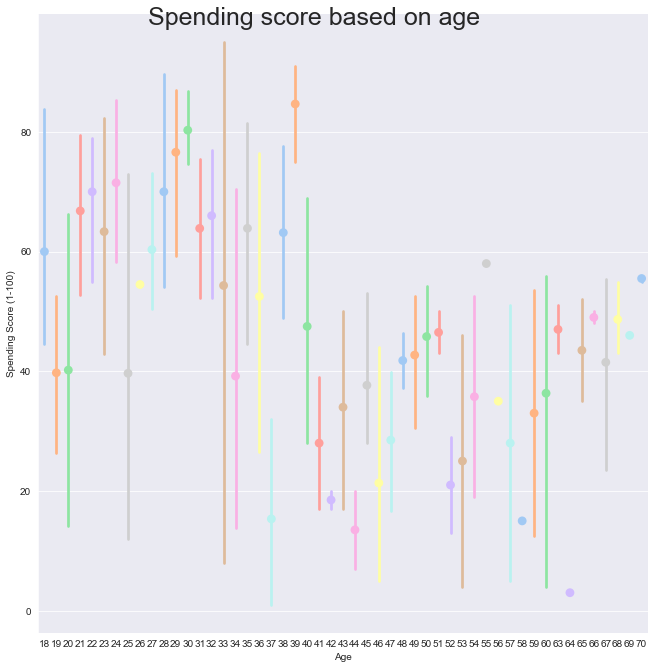

In [13]:
f = sns.factorplot(x="Age", y="Spending Score (1-100)",  data=df,palette='pastel')
f.fig.set_size_inches(10, 10)
f.set_xticklabels(fontsize= 10)
f.fig.suptitle('Spending score based on age', fontsize= 25)

Text(0.5, 0.98, 'Spending score based on Income')

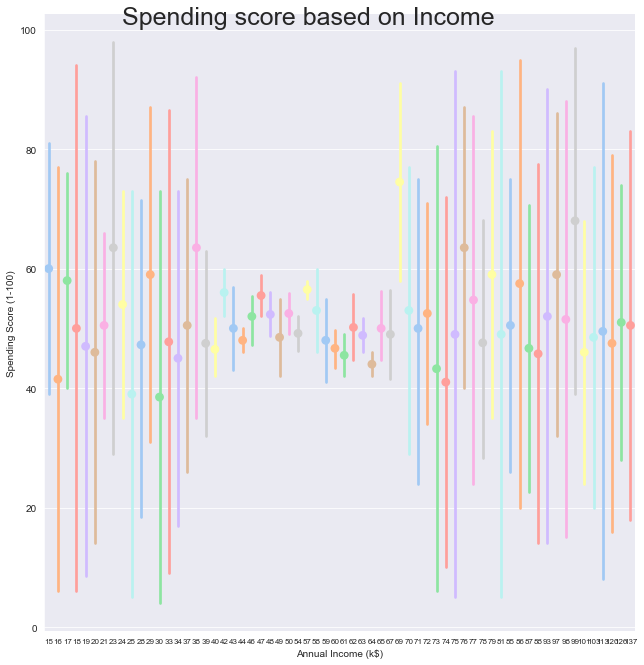

In [14]:
f = sns.factorplot(x="Annual Income (k$)", y="Spending Score (1-100)",  data=df,palette='pastel')
f.fig.set_size_inches(10, 10)
f.set_xticklabels(fontsize= 8)
f.fig.suptitle('Spending score based on Income', fontsize= 25)

In [15]:
from sklearn.cluster import KMeans

In [29]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init = 'k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [30]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30241.34361793659,
 25336.94686147186,
 21850.16528258562,
 19634.554629349972]

Text(0, 0.5, 'WCSS')

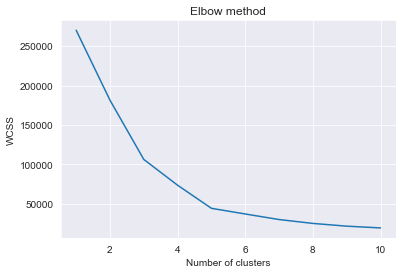

In [31]:
plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

In [32]:
kmeans = KMeans(n_clusters=5,init = 'k-means++',random_state=42)

In [33]:
ykmeans = kmeans.fit_predict(X)

In [38]:
print(ykmeans)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


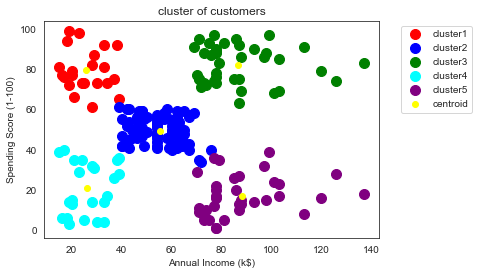

In [64]:
sns.set_style("white")
plt.scatter(X[ykmeans==0,0],X[ykmeans==0,1],s = 100, c = 'red',label = 'cluster1')
plt.scatter(X[ykmeans==1,0],X[ykmeans==1,1],s = 100, c = 'blue',label = 'cluster2')
plt.scatter(X[ykmeans==2,0],X[ykmeans==2,1],s = 100, c = 'green',label = 'cluster3')
plt.scatter(X[ykmeans==3,0],X[ykmeans==3,1],s = 100, c = 'cyan',label = 'cluster4')
plt.scatter(X[ykmeans==4,0],X[ykmeans==4,1],s = 100, c = 'purple',label = 'cluster5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c = 'yellow',label='centroid')
plt.title("cluster of customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1))